In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Вариант 3 2014 C O E B A N MAE

In [3]:
df0 = pd.read_excel('2014.xlsx') # Чтение таблицы из эксель файла в датафрейм 
df0.head() # Смотрим первые пять строк датафрейма

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions,Direct GHG Emissions\n(MtCO2e),Indirect GHG Emissions\n(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)\n(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,16099,4.084010e+09,NaN,4084010096,4453435,NaN,NaN,Queens,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,966.7,806.6,160.1,91968,NaN,Multifamily Housing,NaN
1,500,1.005050e+09,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013.0,Filed,...,Yes,ABS,44,1392.3,337.9,1054.4,235370,214110.0,Distribution Center,1.0
2,5017,1.021420e+09,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032.0,Filed,...,No,None,Not Available,673.6,541.8,131.8,64806,64816.0,Multifamily Housing,1.0
3,5116,1.021750e+09,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040.0,Filed,...,No,None,Not Available,485,403,82,62839,62847.0,Multifamily Housing,1.0
4,363,1.003360e+09,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002.0,Filed,...,No,None,Not Available,435.5,290,145.5,98000,98052.0,Multifamily Housing,1.0


In [4]:
# выводим имена столбцов таблицы
df0.columns 

Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI',
       'Weather Normalized Site EUI', 'Source EUI',
       'Weather Normalized Source EUI',
       'Municipally Supplied Potable Water - Indoor Intensity',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions',
       'Direct GHG Emissions\n(MtCO2e)', 'Indirect GHG Emissions\n(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)\n(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [5]:
df0.shape

(16170, 25)

In [6]:
# Cчитываем в новый датафрейм данные, которые нам нужны по варианту и еще пару 
df = df0[['Record Number', 
          'Co-reported BBL Status','Reported NYC Building Identificaiton Numbers (BINs)', 'Site EUI',
          'Weather Normalized Source EUI', 'Municipally Supplied Potable Water - Indoor Intensity',
          'Primary Property Type - Self Selected','Total GHG Emissions',
          'ENERGY STAR Score']]

In [7]:
df.head()

,Record Number,Co-reported BBL Status,Reported NYC Building Identificaiton Numbers (BINs),Site EUI,Weather Normalized Source EUI,Municipally Supplied Potable Water - Indoor Intensity,Primary Property Type - Self Selected,Total GHG Emissions,ENERGY STAR Score
0,16099,NaN,4453435,180.5,231.8,Not Available,Multifamily Housing,966.7,Not Available
1,500,NaN,1007817,82.1,201.2,8.71,Distribution Center,1392.3,44
2,5017,NaN,1063495,137.7,192.1,Not Available,Multifamily Housing,673.6,Not Available
3,5116,NaN,1064235,103.2,138.2,Not Available,Multifamily Housing,485,Not Available
4,363,NaN,1088884,74,115.8,Not Available,Multifamily Housing,435.5,Not Available


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16170 entries, 0 to 16169
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Record Number                                          16170 non-null  int64 
 1   Co-reported BBL Status                                 912 non-null    object
 2   Reported NYC Building Identificaiton Numbers (BINs)    13790 non-null  object
 3   Site EUI                                               12204 non-null  object
 4   Weather Normalized Source EUI                          13790 non-null  object
 5   Municipally Supplied Potable Water - Indoor Intensity  13790 non-null  object
 6   Primary Property Type - Self Selected                  13133 non-null  object
 7   Total GHG Emissions                                    12380 non-null  object
 8   ENERGY STAR Score                                      13

In [9]:
 # Приводим Energy star score к числовому виду и второй строкой удаляем наны в целевой переменной

df['ENERGY STAR Score']  = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce')
df = df.dropna(subset=['ENERGY STAR Score'])

<ipython-input-9-3146102642bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ENERGY STAR Score']  = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce')


In [10]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 1 to 13783
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Record Number                                          2032 non-null   int64  
 1   Co-reported BBL Status                                 7 non-null      object 
 2   Reported NYC Building Identificaiton Numbers (BINs)    2032 non-null   object 
 3   Site EUI                                               2032 non-null   object 
 4   Weather Normalized Source EUI                          2032 non-null   object 
 5   Municipally Supplied Potable Water - Indoor Intensity  2032 non-null   object 
 6   Primary Property Type - Self Selected                  2032 non-null   object 
 7   Total GHG Emissions                                    2029 non-null   object 
 8   ENERGY STAR Score                               

In [11]:
# Удаляем эти столбцы потому что это ID-шники и никакой информации для регрессора они не принесут
df = df.drop('Co-reported BBL Status', axis = 1)
df = df.drop('Record Number', axis = 1)
df = df.drop('Reported NYC Building Identificaiton Numbers (BINs)', axis = 1)

In [12]:
df.head()

,Site EUI,Weather Normalized Source EUI,Municipally Supplied Potable Water - Indoor Intensity,Primary Property Type - Self Selected,Total GHG Emissions,ENERGY STAR Score
1,82.1,201.2,8.71,Distribution Center,1392.3,44.0
5,36.4,80.8,Not Available,Office,133.7,98.0
7,130,257.3,22.89,Office,1965.4,57.0
11,15.7,23.5,Not Available,Hotel,52.4,100.0
15,79.1,175.2,8.77,Office,653.6,74.0


In [13]:
# приводим каждое значение в данных столбцах к числовому виду. Если не получается, то заменяем NaN
df['Site EUI']  = pd.to_numeric(df['Site EUI'], errors='coerce')
df['Weather Normalized Source EUI']  = pd.to_numeric(df['Weather Normalized Source EUI'], errors='coerce')
df['Municipally Supplied Potable Water - Indoor Intensity'] = pd.to_numeric(df['Municipally Supplied Potable Water - Indoor Intensity'], errors='coerce')
df['Total GHG Emissions']  = pd.to_numeric(df['Total GHG Emissions'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 1 to 13783
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Site EUI                                               2032 non-null   float64
 1   Weather Normalized Source EUI                          1599 non-null   float64
 2   Municipally Supplied Potable Water - Indoor Intensity  668 non-null    float64
 3   Primary Property Type - Self Selected                  2032 non-null   object 
 4   Total GHG Emissions                                    2029 non-null   float64
 5   ENERGY STAR Score                                      2032 non-null   float64
dtypes: float64(5), object(1)
memory usage: 111.1+ KB


In [15]:
#  удаляем столбец потому что в нем слишком много NaN
df = df.drop('Municipally Supplied Potable Water - Indoor Intensity', axis = 1)

In [16]:
df.head()

,Site EUI,Weather Normalized Source EUI,Primary Property Type - Self Selected,Total GHG Emissions,ENERGY STAR Score
1,82.1,201.2,Distribution Center,1392.3,44.0
5,36.4,80.8,Office,133.7,98.0
7,130.0,257.3,Office,1965.4,57.0
11,15.7,23.5,Hotel,52.4,100.0
15,79.1,175.2,Office,653.6,74.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 1 to 13783
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site EUI                               2032 non-null   float64
 1   Weather Normalized Source EUI          1599 non-null   float64
 2   Primary Property Type - Self Selected  2032 non-null   object 
 3   Total GHG Emissions                    2029 non-null   float64
 4   ENERGY STAR Score                      2032 non-null   float64
dtypes: float64(4), object(1)
memory usage: 95.2+ KB


In [18]:
# заполняем пропущенные значения в столбце средним значением для этого столбца
df['Total GHG Emissions'].fillna(df['Total GHG Emissions'].mean(), inplace = True)
df['Weather Normalized Source EUI'].fillna(df['Weather Normalized Source EUI'].mean(), inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 1 to 13783
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site EUI                               2032 non-null   float64
 1   Weather Normalized Source EUI          2032 non-null   float64
 2   Primary Property Type - Self Selected  2032 non-null   object 
 3   Total GHG Emissions                    2032 non-null   float64
 4   ENERGY STAR Score                      2032 non-null   float64
dtypes: float64(4), object(1)
memory usage: 95.2+ KB


array([[<AxesSubplot:xlabel='Site EUI', ylabel='Site EUI'>,
        <AxesSubplot:xlabel='Weather Normalized Source EUI', ylabel='Site EUI'>,
        <AxesSubplot:xlabel='Total GHG Emissions', ylabel='Site EUI'>,
        <AxesSubplot:xlabel='ENERGY STAR Score', ylabel='Site EUI'>],
       [<AxesSubplot:xlabel='Site EUI', ylabel='Weather Normalized Source EUI'>,
        <AxesSubplot:xlabel='Weather Normalized Source EUI', ylabel='Weather Normalized Source EUI'>,
        <AxesSubplot:xlabel='Total GHG Emissions', ylabel='Weather Normalized Source EUI'>,
        <AxesSubplot:xlabel='ENERGY STAR Score', ylabel='Weather Normalized Source EUI'>],
       [<AxesSubplot:xlabel='Site EUI', ylabel='Total GHG Emissions'>,
        <AxesSubplot:xlabel='Weather Normalized Source EUI', ylabel='Total GHG Emissions'>,
        <AxesSubplot:xlabel='Total GHG Emissions', ylabel='Total GHG Emissions'>,
        <AxesSubplot:xlabel='ENERGY STAR Score', ylabel='Total GHG Emissions'>],
       [<AxesSubplot:xlabe

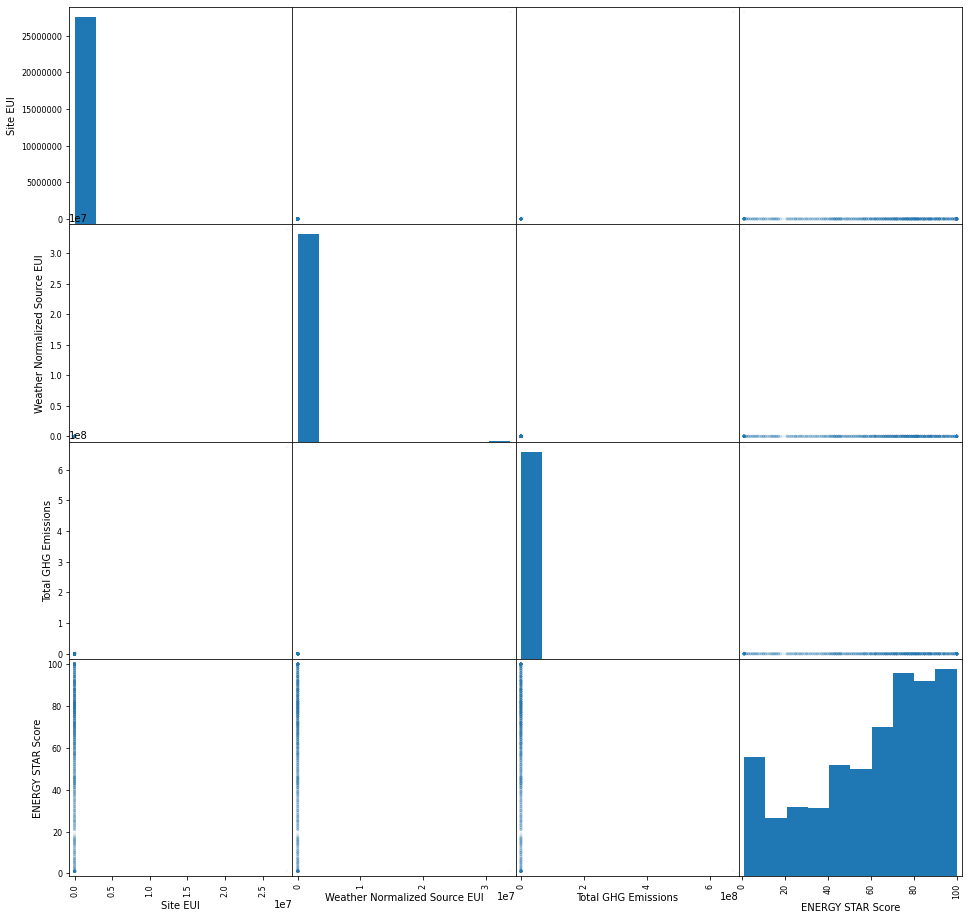

In [20]:
# строим график распределения одного параметра относительно другого
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.05, figsize=(16, 16))

In [21]:
# Считаем кол-во встречающихся значений для данного столбца
df['Primary Property Type - Self Selected'].value_counts()

Office                                   1133
Hotel                                     176
Non-Refrigerated Warehouse                149
Residence Hall/Dormitory                  111
Senior Care Community                     100
K-12 School                                85
Retail Store                               81
Distribution Center                        56
Hospital (General Medical & Surgical)      45
Medical Office                             29
Worship Facility                           15
Supermarket/Grocery Store                  15
Financial Office                           13
Refrigerated Warehouse                      9
Strip Mall                                  4
Parking                                     2
Multifamily Housing                         2
Other                                       2
Data Center                                 2
Bank Branch                                 1
Social/Meeting Hall                         1
Mixed Use Property                

In [22]:
# Кодируем ONE-HOT CODING
ohc_ppt = pd.get_dummies(df['Primary Property Type - Self Selected'])

In [23]:
# Выкидываем из нашей пандосовской таблицы столбец Primary Property Type
df = df.drop(['Primary Property Type - Self Selected'], axis=1)

# Объединяем наш датафрейм с таблицей Ван хот кодирования районов 
df = pd.concat([df, ohc_ppt], axis = 1)

In [24]:
df.shape

(2032, 26)

# Обучение

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
# присваеваем переменной labels столбец Energy star Score
# создаем новую таблицу data, копируя df без столбца Energy star Score
labels = df['ENERGY STAR Score']
data = df.drop(['ENERGY STAR Score'], axis=1)

In [27]:
# По заданию меняем значения в лейблы на метки класса (0, 1) ПОТОМУ ЧТО В ЗДЕСЬ ЗАДАЧА КЛАССИФИКАЦИИ, А НЕ РЕГРЕССИИ
# в регрессии мы предсказываем число, а в классификации метку класса

labels.loc[labels < 70] = 0
labels.loc[labels >= 70] = 1

/Users/igor/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/igor/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [28]:
# делим нашу выборку на тренировочную и проверочные в соотношении 70 на 30
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                   test_size = 0.3,
                                                   random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1422, 25)
(610, 25)
(1422,)
(610,)


In [29]:
# строим график зависимости точности от параметра по варианту. Параметр по варианту - min_samples_leaf
# (минимальное число объектов в листе. По дефолту 1)
tochnost = [] # массив для хранения точности предсказаний дерева
n = [] # массив для хранения кол-ва объектов в листе (min_samples_leaf)

for i in range (1, 15):
    tree = DecisionTreeClassifier(min_samples_leaf=i,random_state = 17)
    tree.fit(X_train, y_train)
    tree.score(X_test, y_test)
    predictions = tree.predict(X_test)
    tochnost.append(metrics.accuracy_score(y_test, predictions))
    n.append(i)

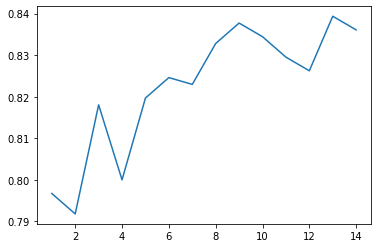

In [30]:
plt.plot(n, tochnost)

In [31]:
y_test[:10]

1868     0.0
3845     1.0
1325     0.0
1453     0.0
13497    0.0
3074     1.0
1698     0.0
1039     0.0
5795     1.0
8052     1.0
Name: ENERGY STAR Score, dtype: float64

In [32]:
predictions[:10]

array([0., 0., 0., 0., 0., 1., 0., 1., 1., 1.])

# Случайный лес

In [33]:
from sklearn import ensemble

In [34]:
# критерий по варианту max_features - число признаков, по которым ищется разбиение.

tochnost = [] # массив для хранения точности предсказаний леса
n = [] # массив для хранения числа признаков, необходимых для разбиения

for i in range(1, 20):
    rf = ensemble.RandomForestClassifier(max_features=i, random_state=11) 
    rf.fit(X_train, y_train) # тренируем лес
    prediction_rf = rf.predict(X_test)

    tochnost.append(metrics.accuracy_score(y_test, prediction_rf))
    n.append(i)

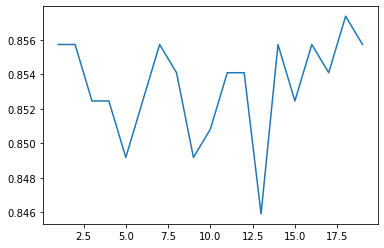

In [35]:
plt.plot(n, tochnost)

# Отбор признаков с помощью алгоритма случайного леса

In [36]:
import numpy as np

In [37]:
#Выводим, насоклько каждый параметр повлиял на обучение дерева. Т.е какой параметр по мнению дерева сильнее влияет
# на Energy Star score

In [38]:
feature_names = data.columns # в переменную feature_names записываем имена столбцов

In [39]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print('Feature imprortances:')
for f, idx in enumerate(indices):
    print("{:2d}.feature '{:5s}' ({:.4f})".format(f+1, feature_names[idx], importances[idx]))

Feature imprortances:
 1.feature 'Site EUI' (0.4734)
 2.feature 'Weather Normalized Source EUI' (0.2303)
 3.feature 'Total GHG Emissions' (0.1718)
 4.feature 'Office' (0.0562)
 5.feature 'Non-Refrigerated Warehouse' (0.0094)
 6.feature 'Senior Care Community' (0.0089)
 7.feature 'Distribution Center' (0.0084)
 8.feature 'Hospital (General Medical & Surgical)' (0.0078)
 9.feature 'Medical Office' (0.0062)
10.feature 'Hotel' (0.0061)
11.feature 'Retail Store' (0.0047)
12.feature 'Residence Hall/Dormitory' (0.0045)
13.feature 'K-12 School' (0.0043)
14.feature 'Data Center' (0.0020)
15.feature 'Financial Office' (0.0018)
16.feature 'Worship Facility' (0.0017)
17.feature 'Multifamily Housing' (0.0014)
18.feature 'Supermarket/Grocery Store' (0.0007)
19.feature 'Other' (0.0002)
20.feature 'Parking' (0.0001)
21.feature 'Refrigerated Warehouse' (0.0001)
22.feature 'Bank Branch' (0.0000)
23.feature 'Mixed Use Property' (0.0000)
24.feature 'Social/Meeting Hall' (0.0000)
25.feature 'Strip Mall' (0

In [40]:
# Выводим тоже самое, только в графике

(-1.0, 7.0)

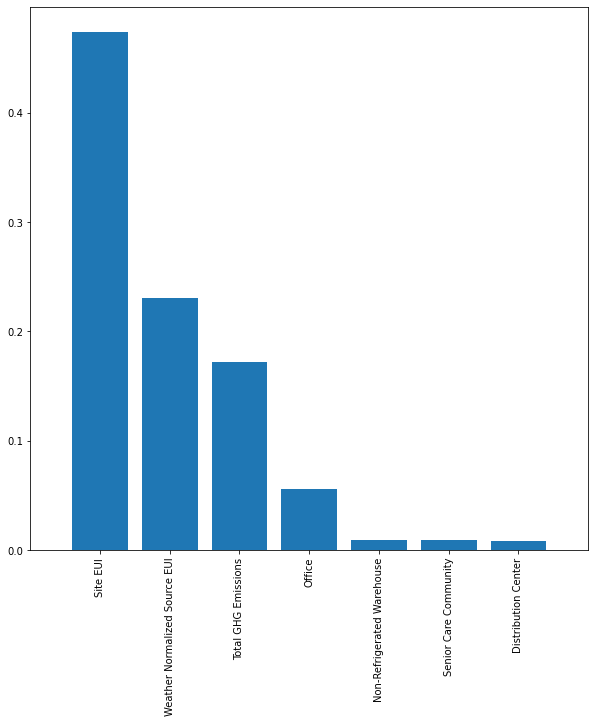

In [41]:
d_first = 7
plt.figure(figsize=(10,10))
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])